In [1]:
import pickle
import numpy as np

- `Import All Necessary Things`

In [2]:
with open('./Word_to_idx.pkl','rb') as f:
    word_to_idx = pickle.load(f)
    
with open('./Idx_to_word.pkl','rb') as f:
    idx_to_word = pickle.load(f)
    
with open('./Encoded features/encoded_test_feature.pkl','rb') as f:
    encoding_test = pickle.load(f)

- `Import Model`

In [3]:
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences

In [4]:
model = load_model('./model_weights/model_10.h5')

### Predictions

In [5]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [6]:
max_length = 33

In [13]:
def predict_caption(caption):
    
    in_text = '<start>'
    for i in range(max_length):
        sequence = [word_to_idx[word] for word in in_text.split() if word in word_to_idx]
        sequence = pad_sequences([sequence],maxlen=max_length,padding='post')
        
        ypred = model.predict([photo,sequence])
        ypred = np.argmax(ypred)
        word = idx_to_word[ypred]
        in_text += (' '+word)
        
        if word == '<end>':
            break
            
    final_caption = in_text.split()[1:-1]
    final_caption = ' '.join(final_caption)
        
    return final_caption

man in black shirt and tie is sitting on the couch of brick wall and looks at the other of them is checking the other is checking the other is checking the


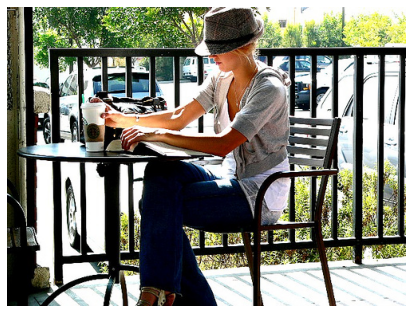

dog is running through the grass with stick in its mouth and is walking through the snow with trees in the background and the sun landscape area in the middle of the


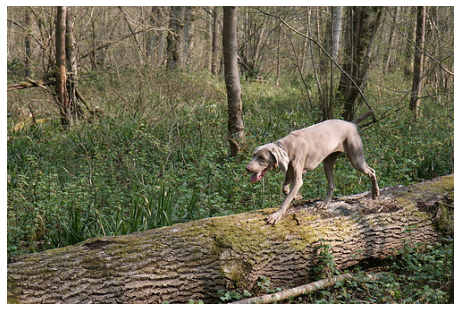

man in black jacket and black jacket is standing in front of brick wall with his eyes and his feet her hand and his feet her hand and his feet her hand


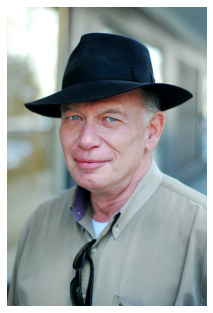

man in the red shirt is climbing up rock with others people are all standing in the shade and one man in the red shirt is standing in front of some rock


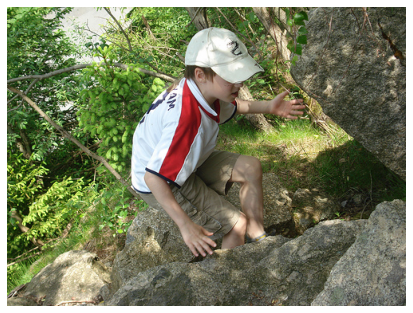

dog is running through the water with ball in its mouth and the water and is walking through the water and the water in the water and splashing the water in the


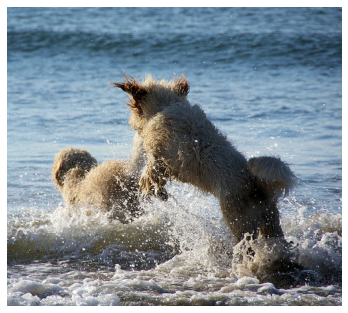

girl in pink shirt is swinging on the grass with his feet in the air and onlookers behind him runs through the grass near the camera of the air and onlookers behind


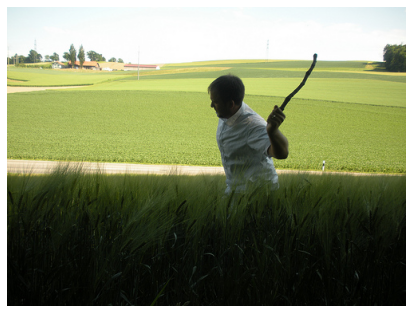

dog is playing with the brown dog on the grass with his mouth open and is standing on the hind legs and the other dog is biting the other is biting the


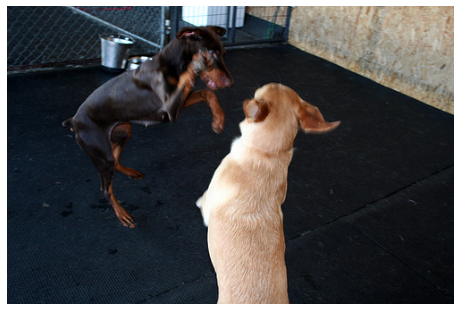

girl in the yellow dress is holding up her arms on the beach holding up her arms out to her right on the beach holding up her back in the shallow and


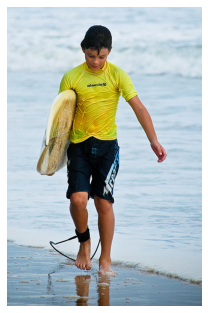

man in the blue shirt is playing with the brown dog on the grass with his mouth open and tongue sticking on its hind legs and the other dog is trying to


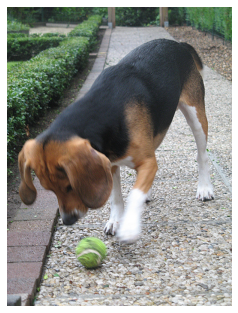

man in the red shirt is standing in front of canal and people are standing in the woods and one girl helps to be the far in the background and the others


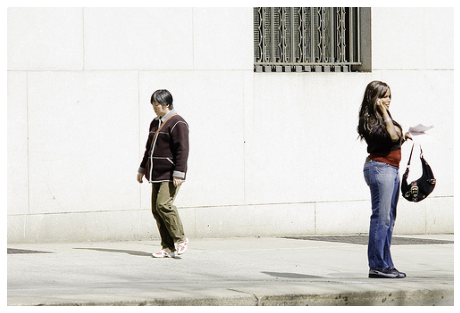

man in the red shirt is standing in front of an art the other people are standing in the midst of the red and green and green and black hat and black


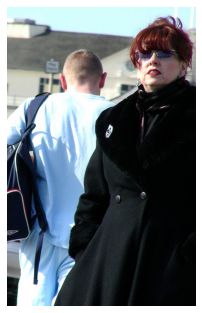

the beach in front of canal and two people are suspended the sun and one is pulled them are all pulled them and one is pulled them is pulled them are pulled


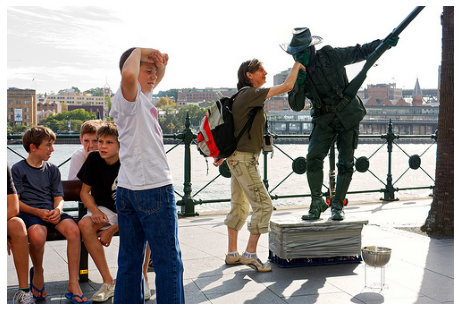

girl in pink shirt and white shirt is sitting on the floor of an adult male and woman are standing on the floor of an orange and green and white striped and


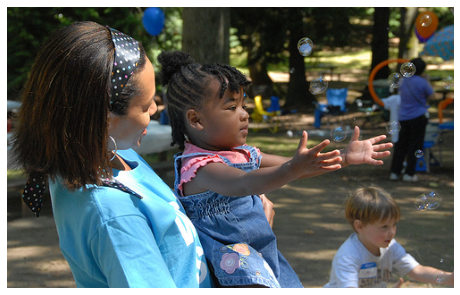

dog runs through snow covered snow covered snow covered snow covered snow covered snow in the snow with snow in the snow and snow in the snow with snow in the snow


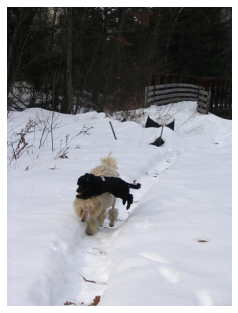

woman in the blue shirt is standing in front of the water and another man stands behind him in the midst of the water and another man stands behind him in the


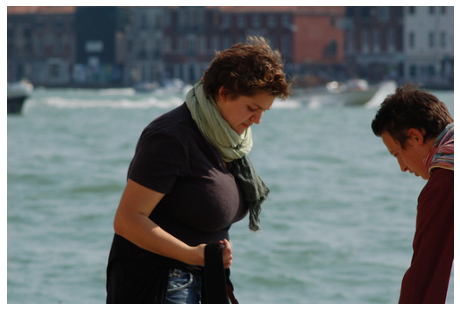

In [14]:
for i in range(15):
    idx = np.random.randint(1,1000)
    images = list(encoding_test.keys())
    img = images[idx]
    photo = encoding_test[img].reshape((1,2048))
    
    caption = predict_caption(photo)
    image = plt.imread('../Dataset/Flickr8k/Images/'+img)
    print(caption)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

In [10]:
print(word_to_idx)

{'child': 1, 'in': 2, 'pink': 3, 'dress': 4, 'is': 5, 'climbing': 6, 'up': 7, 'set': 8, 'of': 9, 'stairs': 10, 'an': 11, 'way': 12, 'girl': 13, 'going': 14, 'into': 15, 'wooden': 16, 'building': 17, 'little': 18, 'the': 19, 'to': 20, 'her': 21, 'black': 22, 'dog': 23, 'and': 24, 'spotted': 25, 'are': 26, 'fighting': 27, 'tri': 28, 'colored': 29, 'playing': 30, 'with': 31, 'each': 32, 'other': 33, 'on': 34, 'road': 35, 'white': 36, 'brown': 37, 'spots': 38, 'staring': 39, 'at': 40, 'street': 41, 'two': 42, 'dogs': 43, 'different': 44, 'looking': 45, 'pavement': 46, 'moving': 47, 'toward': 48, 'covered': 49, 'paint': 50, 'sits': 51, 'front': 52, 'painted': 53, 'rainbow': 54, 'hands': 55, 'bowl': 56, 'sitting': 57, 'large': 58, 'small': 59, 'grass': 60, 'plays': 61, 'it': 62, 'there': 63, 'pigtails': 64, 'painting': 65, 'young': 66, 'outside': 67, 'man': 68, 'lays': 69, 'bench': 70, 'while': 71, 'his': 72, 'by': 73, 'him': 74, 'which': 75, 'also': 76, 'tied': 77, 'sleeping': 78, 'next': 7